# **EDA**

In [1]:
import pandas as pd

## Dataset Overview

In [52]:
df = pd.read_csv("../data/train_storming_round.csv")
df.head()

,row_id,agent_code,agent_age,agent_join_month,first_policy_sold_month,year_month,unique_proposals_last_7_days,unique_proposals_last_15_days,unique_proposals_last_21_days,unique_proposal,...,unique_quotations,unique_customers_last_7_days,unique_customers_last_15_days,unique_customers_last_21_days,unique_customers,new_policy_count,ANBP_value,net_income,number_of_policy_holders,number_of_cash_payment_policies
0,1,455ca878,45,2/1/2021,9/1/2023,1/1/2023,3,6,2,12,...,9,3,4,8,15,0,0,93313,30,162
1,2,c823ce77,48,4/1/2022,2/1/2024,1/1/2023,1,4,12,21,...,14,4,3,10,17,25,1071450,164804,0,175
2,3,62154055,53,5/1/2020,9/1/2023,1/1/2023,3,5,5,17,...,14,3,7,11,21,26,1601210,426690,84,78
3,4,c58bfa6e,44,7/1/2019,3/1/2022,1/1/2023,1,0,12,17,...,11,2,2,9,13,18,283230,47793,39,144
4,5,b1e5f770,20,9/1/2020,2/1/2023,1/1/2023,0,6,10,17,...,13,3,10,6,19,20,1957680,562239,19,40


In [23]:
df.describe(include="all")

,row_id,agent_code,agent_age,agent_join_month,first_policy_sold_month,year_month,unique_proposals_last_7_days,unique_proposals_last_15_days,unique_proposals_last_21_days,unique_proposal,...,unique_quotations,unique_customers_last_7_days,unique_customers_last_15_days,unique_customers_last_21_days,unique_customers,new_policy_count,ANBP_value,net_income,number_of_policy_holders,number_of_cash_payment_policies
count,15308.000000,15308,15308.000000,15308,15308,15308,15308.000000,15308.000000,15308.000000,15308.000000,...,15308.000000,15308.000000,15308.000000,15308.000000,15308.000000,15308.000000,1.530800e+04,1.530800e+04,15308.000000,15308.000000
unique,NaN,905,NaN,64,28,20,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,455ca878,NaN,5/1/2019,4/1/2024,8/1/2024,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,20,NaN,520,1305,905,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,7654.500000,NaN,40.585772,NaN,NaN,NaN,1.491246,2.991116,10.045728,17.516527,...,13.922394,2.995493,4.997714,7.500523,15.493729,20.269990,1.025338e+06,2.280414e+05,30.968317,101.180886
std,4419.183296,NaN,11.688204,NaN,NaN,NaN,1.119554,2.001613,6.037296,6.616954,...,4.663777,1.644117,2.438918,3.468597,4.542321,9.541693,8.054989e+05,1.736671e+05,24.621933,75.323464
min,1.000000,NaN,20.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,1.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000e+00,1.160000e+03,0.000000,0.000000
25%,3827.750000,NaN,31.000000,NaN,NaN,NaN,0.000000,1.000000,5.000000,12.000000,...,11.000000,2.000000,3.000000,5.000000,12.000000,15.000000,3.473238e+05,9.282500e+04,12.000000,38.000000
50%,7654.500000,NaN,41.000000,NaN,NaN,NaN,1.000000,3.000000,10.000000,17.000000,...,14.000000,3.000000,5.000000,8.000000,15.000000,21.000000,9.031445e+05,1.899740e+05,28.000000,90.000000
75%,11481.250000,NaN,51.000000,NaN,NaN,NaN,2.000000,5.000000,15.000000,23.000000,...,17.000000,4.000000,7.000000,10.000000,19.000000,27.000000,1.560700e+06,3.217448e+05,48.000000,152.000000


In [25]:
df.dtypes

row_id                              int64
agent_code                         object
agent_age                           int64
agent_join_month                   object
first_policy_sold_month            object
year_month                         object
unique_proposals_last_7_days        int64
unique_proposals_last_15_days       int64
unique_proposals_last_21_days       int64
unique_proposal                     int64
unique_quotations_last_7_days       int64
unique_quotations_last_15_days      int64
unique_quotations_last_21_days      int64
unique_quotations                   int64
unique_customers_last_7_days        int64
unique_customers_last_15_days       int64
unique_customers_last_21_days       int64
unique_customers                    int64
new_policy_count                    int64
ANBP_value                          int64
net_income                          int64
number_of_policy_holders            int64
number_of_cash_payment_policies     int64
dtype: object

### Data cleaning - datetime

In [56]:
date_columns = ['agent_join_month', 'first_policy_sold_month', 'year_month']

for col in date_columns:
    df[col] = pd.to_datetime(df[col], format='mixed', dayfirst=False, errors='coerce')

df['year_month'].value_counts()

year_month
2024-08-01    905
2024-07-01    892
2024-06-01    871
2024-05-01    851
2024-04-01    842
2024-03-01    822
2024-02-01    806
2024-01-01    792
2023-12-01    775
2023-11-01    763
2023-10-01    755
2023-09-01    745
2023-08-01    730
2023-07-01    716
2023-06-01    699
2023-05-01    688
2023-04-01    677
2023-03-01    670
2023-02-01    659
2023-01-01    650
Name: count, dtype: int64

In [58]:
df.shape

(15308, 23)

In [51]:
df.dtypes

row_id                              int64
agent_code                         object
agent_age                           int64
agent_join_month                   object
first_policy_sold_month            object
year_month                         object
unique_proposals_last_7_days        int64
unique_proposals_last_15_days       int64
unique_proposals_last_21_days       int64
unique_proposal                     int64
unique_quotations_last_7_days       int64
unique_quotations_last_15_days      int64
unique_quotations_last_21_days      int64
unique_quotations                   int64
unique_customers_last_7_days        int64
unique_customers_last_15_days       int64
unique_customers_last_21_days       int64
unique_customers                    int64
new_policy_count                    int64
ANBP_value                          int64
net_income                          int64
number_of_policy_holders            int64
number_of_cash_payment_policies     int64
dtype: object

## Data exploration


In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\User\AppData\Local\Temp\ipykernel_12528\4238565235.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='year_month', y='new_policy_count', data=monthly_policy_sales, palette='Set2')


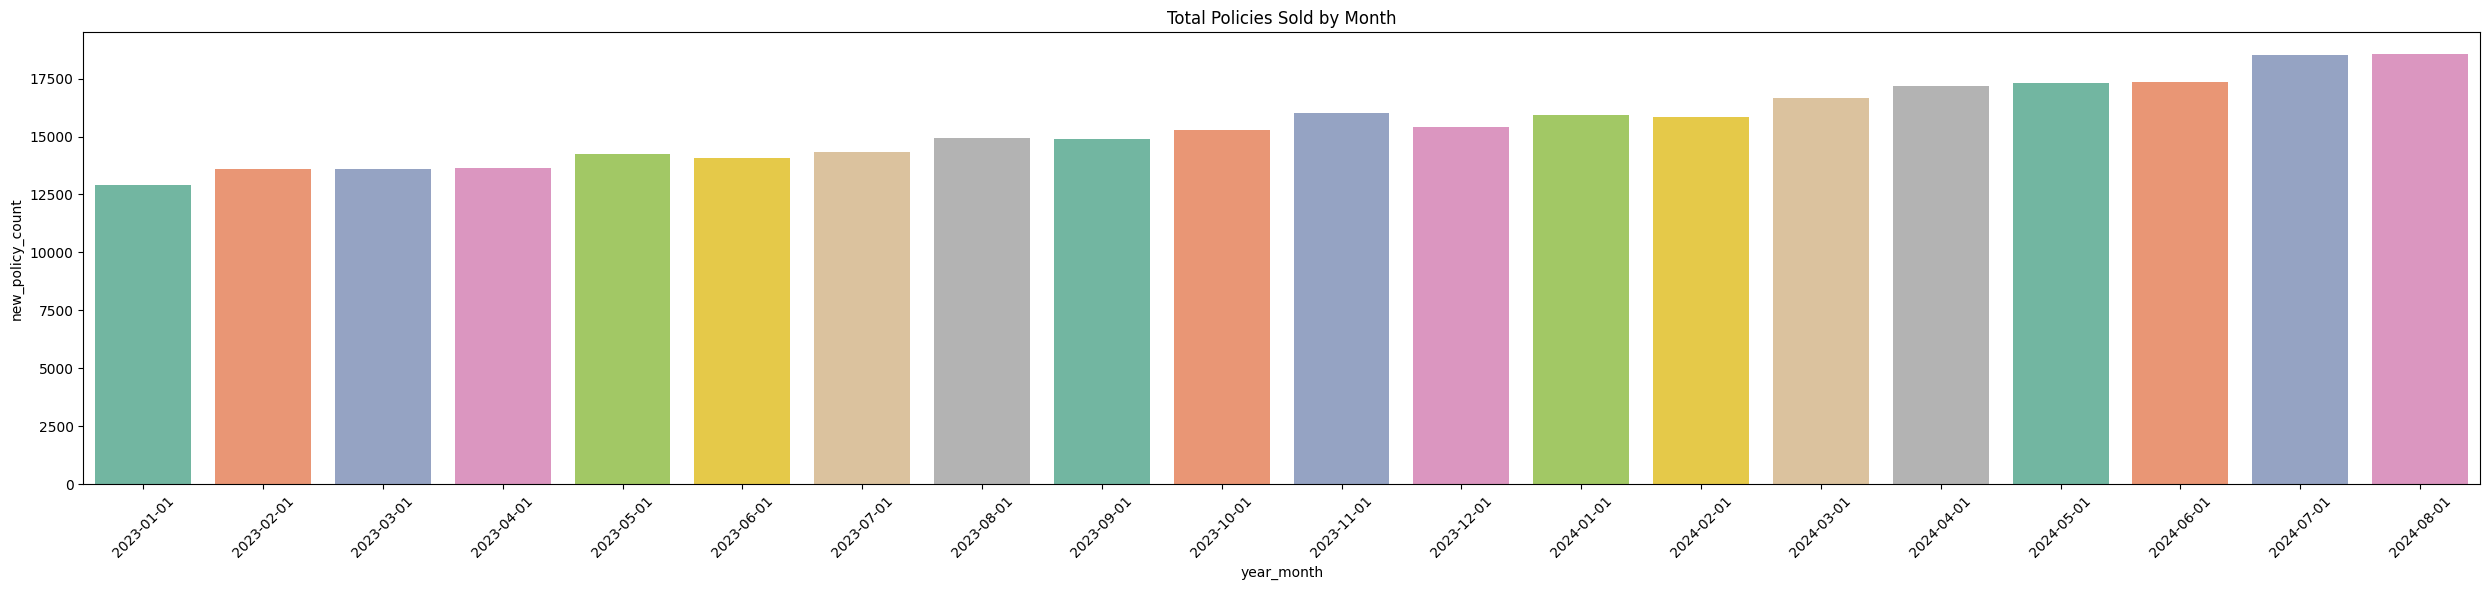

In [65]:
monthly_policy_sales = df.groupby('year_month')['new_policy_count'].sum().reset_index()

plt.figure(figsize=(25, 6))
sns.barplot(x='year_month', y='new_policy_count', data=monthly_policy_sales, palette='Set2')
plt.title('Total Policies Sold by Month')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [66]:
df = df.drop('agent_code', axis=1)


KeyError: "['agent_code'] not found in axis"

Text(0.5, 1.0, 'Correlation Heatmap')

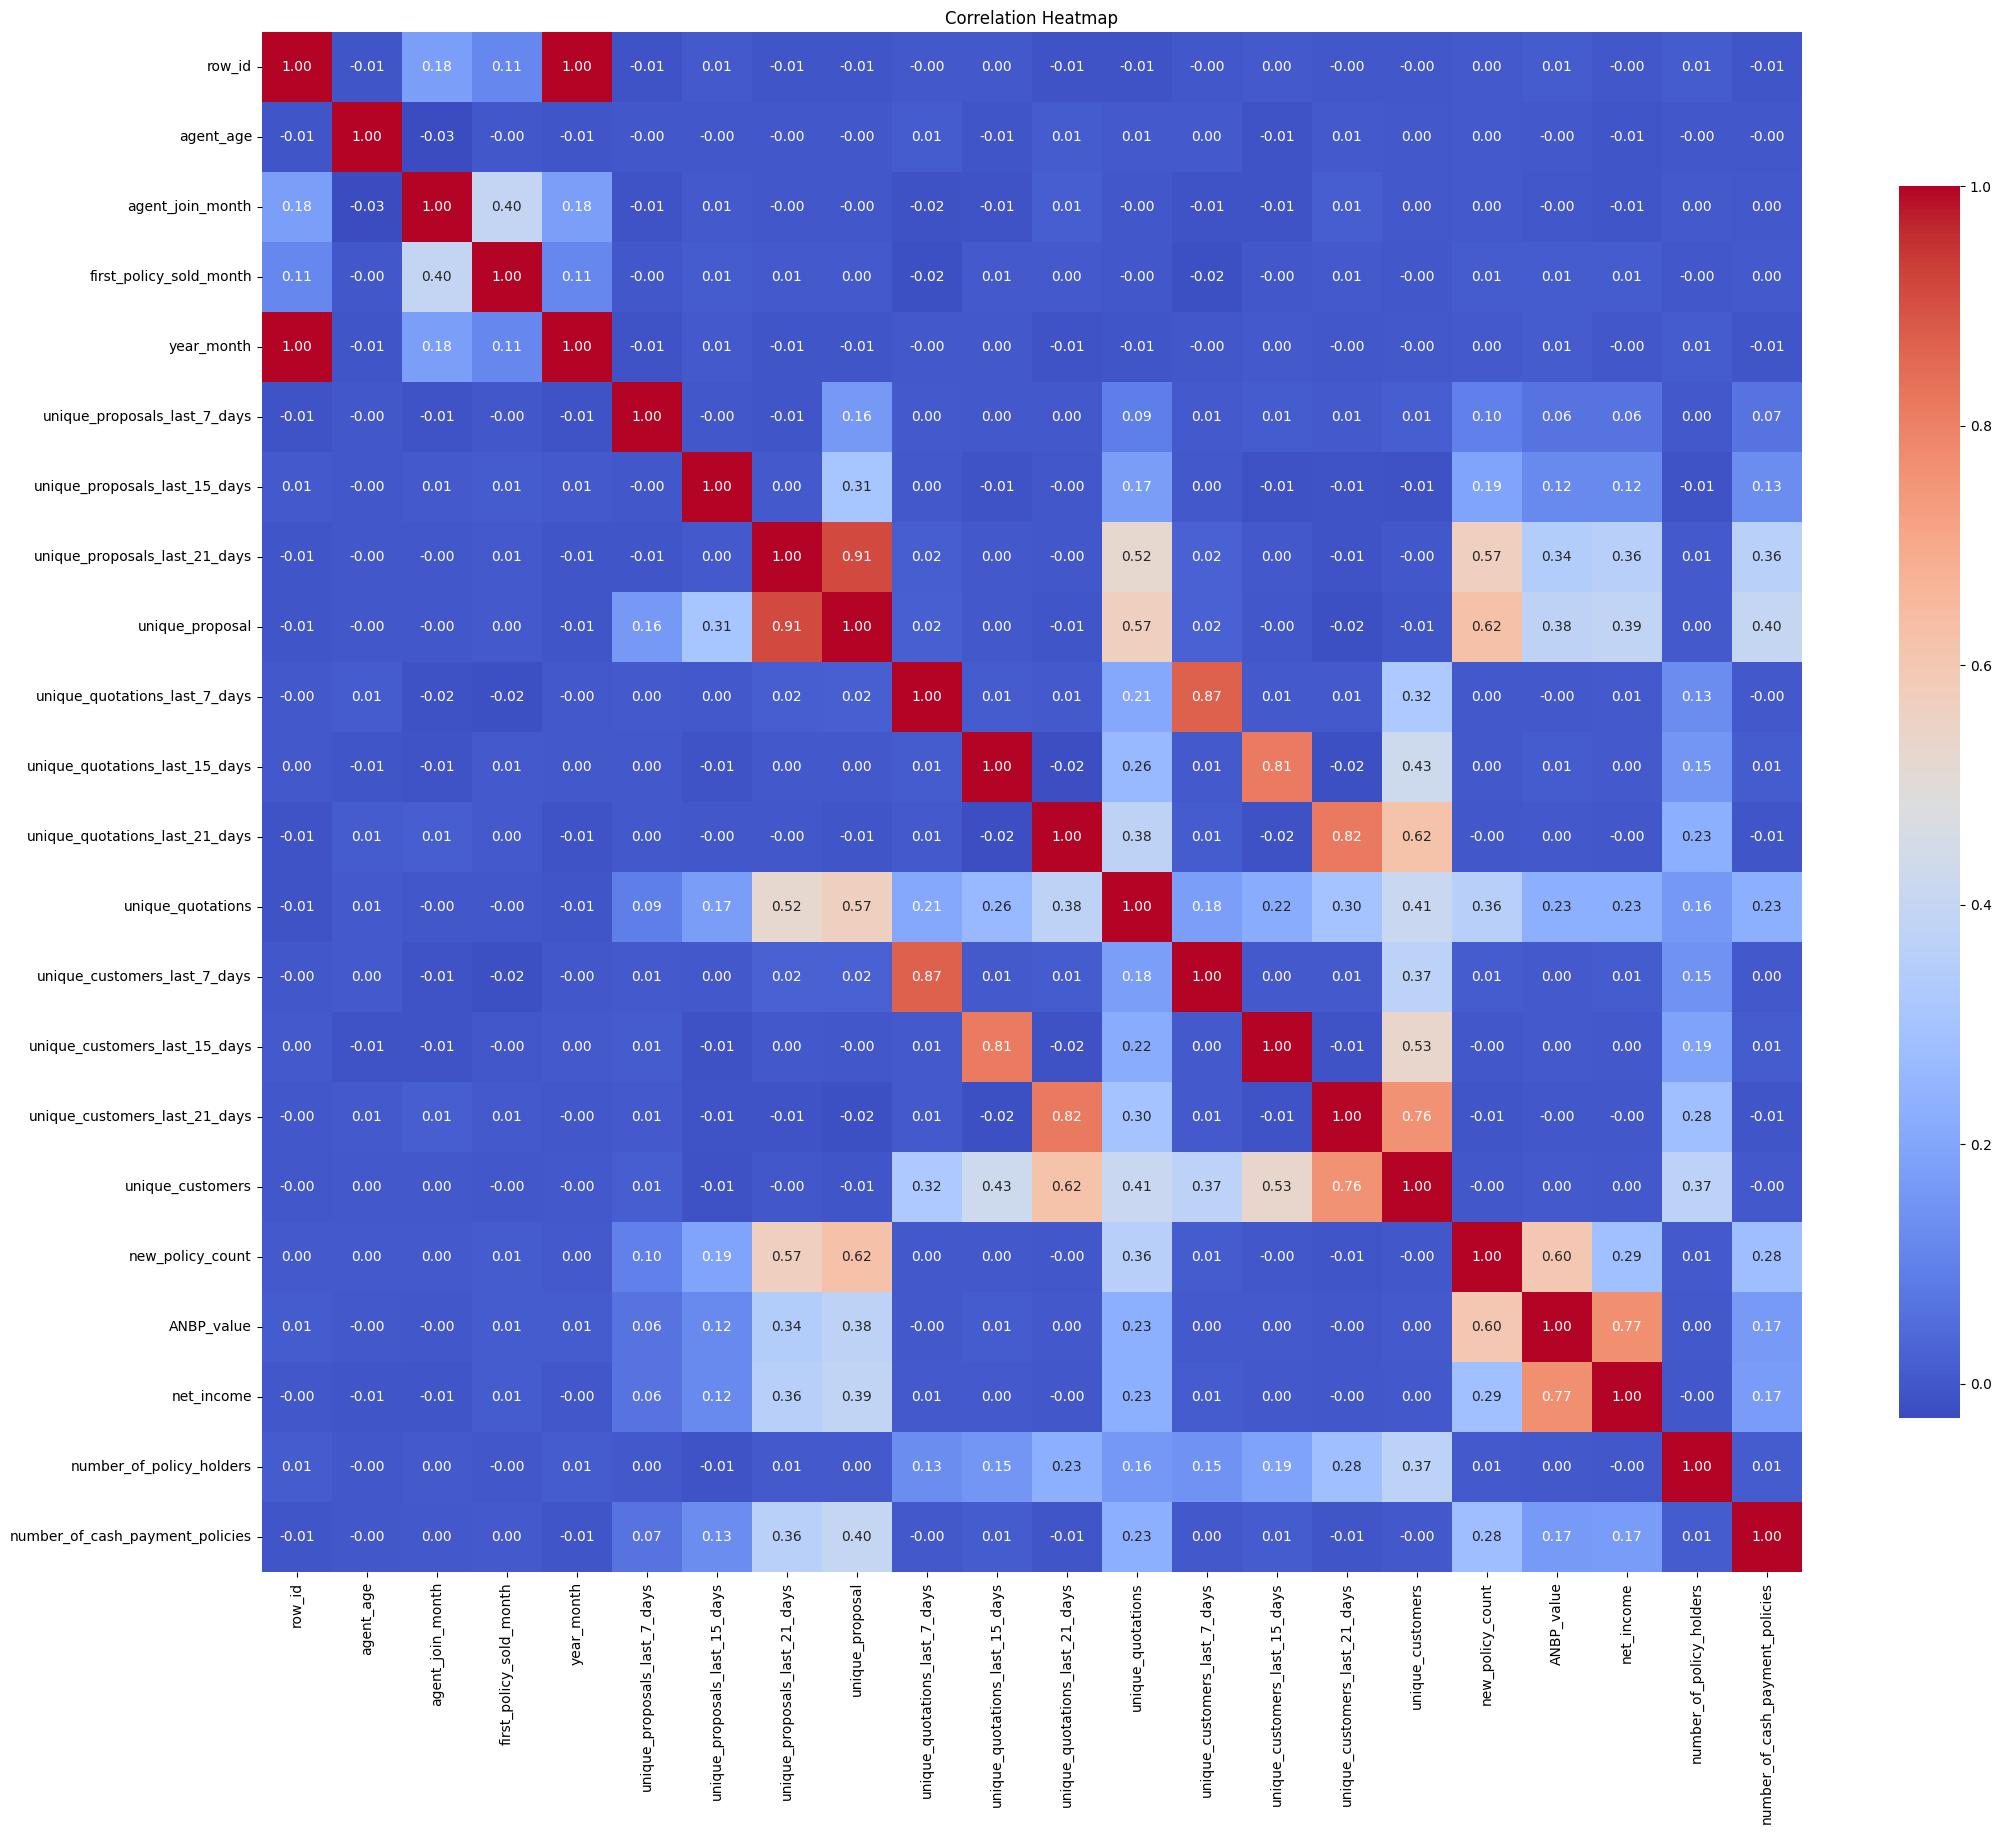

In [67]:
corr = df.corr()
plt.figure(figsize=(25, 20))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Heatmap')

In [68]:
monthly_policy_sales

,year_month,new_policy_count
0,2023-01-01,12887
1,2023-02-01,13617
2,2023-03-01,13591
3,2023-04-01,13629
4,2023-05-01,14248
5,2023-06-01,14065
6,2023-07-01,14327
7,2023-08-01,14956
8,2023-09-01,14896
9,2023-10-01,15273
